In [1]:
%matplotlib notebook

In [2]:
# Dependencies.
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
csv_path_2015 = Path("Data_Ref_2015.csv")
csv_path_2017 = Path("Data_Ref_2017.csv")
csv_path_2018 = Path("Data_Ref_2018.csv")
csv_path_2020 = Path("Data_Ref_2020.csv")
csv_path_2022 = Path("Data_Ref_2022.csv")

In [4]:
low_memory=False
CD15 = pd.read_csv(csv_path_2015)
CD17 = pd.read_csv(csv_path_2017)
CD18 = pd.read_csv(csv_path_2018)
CD20 = pd.read_csv(csv_path_2020)
CD22 = pd.read_csv(csv_path_2022)

C:\Users\EFMel\AppData\Local\Temp\ipykernel_29760\132651849.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  CD22 = pd.read_csv(csv_path_2022)


In [5]:
CD22["incident_id"] = CD22["incident_id"].astype(np.int64)

In [12]:
# Isolate number of unique incident ID's for reference.
Incidents15 = len(CD15["incident_id"].unique())
Incidents17 = len(CD17["INCIDENT_ID"].unique())
Incidents18 = len(CD18["INCIDENT_ID"].unique())
Incidents20 = len(CD20["INCIDENT_ID"].unique())
Incidents22 = len(CD22["incident_id"].unique())
Incident_Master = pd.DataFrame({"Year":[2015, 2017, 2018, 2020, 2022], 
                   "Incidents":[Incidents15, Incidents17, Incidents18, Incidents20, Incidents22]})
Incident_Master

,Year,Incidents
0,2015,457238
1,2017,409541
2,2018,461161
3,2020,409541
4,2022,402260


In [13]:
Offenses15 = len(CD15["offense_id"].unique())
Offenses17 = len(CD17["OFFENSE_ID"].unique())
Offenses18 = len(CD18["OFFENSE_ID"].unique())
Offenses20 = len(CD20["OFFENSE_ID"].unique())
Offenses22 = len(CD22["offense_id"].unique())
Offenses_Master = pd.DataFrame({"Year":[2015, 2017, 2018, 2020, 2022], 
                   "Offenses":[Offenses15, Offenses17, Offenses18, Offenses20, Offenses22]})
Offenses_Master

,Year,Offenses
0,2015,510923
1,2017,473941
2,2018,527986
3,2020,473941
4,2022,467550


<IPython.core.display.Javascript object>


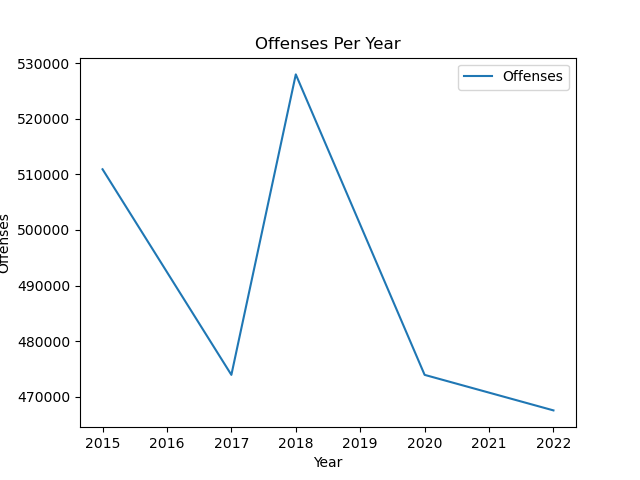

Text(0, 0.5, 'Offenses')

In [37]:
Offenses_Master.plot.line(y = "Offenses", x = "Year", title = "Offenses Per Year")
plt.xlabel("Year")
plt.ylabel("Offenses")

In [41]:
Race15 = CD15["race"].value_counts()
Race17 = CD17["RACE"].value_counts()
Race18 = CD18["RACE"].value_counts()
Race20 = CD20["RACE"].value_counts()
Race22 = CD22["race"].value_counts()
Race_Master = pd.DataFrame({
    2015:Race15, 
    2017:Race17,
    2018:Race18, 
    2020:Race20, 
    2022:Race22
}).fillna(0)
Race_Master

,2015,2017,2018,2020,2022
American Indian or Alaska Native,633.0,779.0,723.0,779.0,724
Asian,2804.0,1480.0,1962.0,1480.0,1673
Black or African American,220494.0,206174.0,238534.0,206174.0,203507
Native Hawaiian or Other Pacific Islander,205.0,301.0,334.0,301.0,526
Not Specified,0.0,0.0,0.0,0.0,101653
Unknown,174195.0,158937.0,170712.0,158937.0,60545
White,309963.0,276032.0,327807.0,276032.0,243526


<IPython.core.display.Javascript object>


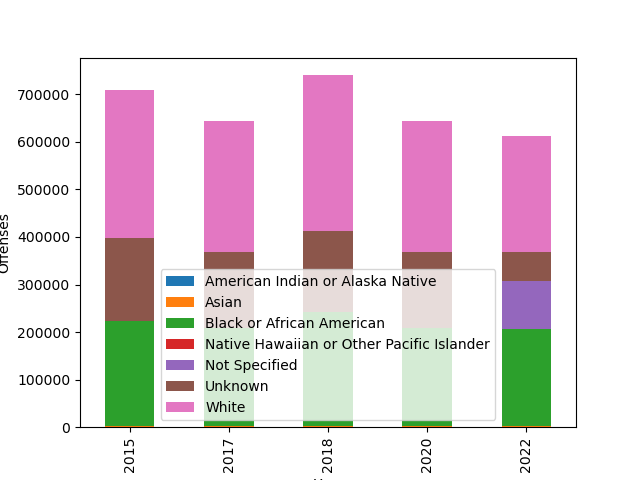

Text(0, 0.5, 'Offenses')

In [58]:
Race_Master.T.plot.bar(stacked = True)
plt.legend(loc = "lower center")
plt.xlabel("Year")
plt.ylabel("Offenses")

#Need to swap the years with the categories

In [59]:
Sex15 = CD15["sex_code_y"].value_counts().map("{:,.0f}".format)
Sex17 = CD17["SEX_CODE_y"].value_counts().map("{:,.0f}".format)
Sex18 = CD18["SEX_CODE_y"].value_counts().map("{:,.0f}".format)
Sex20 = CD20["SEX_CODE_y"].value_counts().map("{:,.0f}".format)
Sex22 = CD22["sex_code_y"].value_counts().map("{:,.0f}".format)
Sex_Master = pd.DataFrame({
    2015:Sex15, 
    2017:Sex17,
    2018:Sex18, 
    2020:Sex20, 
    2022:Sex22
}).fillna(0)
Sex_Master.drop(["X"])

,2015,2017,2018,2020,2022
F,"167,089","151,709","181,318","151,709","138,032"
M,"374,854","341,703","395,638","341,703","320,550"
U,"71,190","92,652","105,066","92,652","51,919"


In [16]:
Location15 = CD15["location_name"].value_counts().map("{:,.0f}".format)
Location17 = CD17["LOCATION_NAME"].value_counts().map("{:,.0f}".format)
Location18 = CD18["LOCATION_NAME"].value_counts().map("{:,.0f}".format)
Location20 = CD20["LOCATION_NAME"].value_counts().map("{:,.0f}".format)
Location22 = CD22["location_name"].value_counts().map("{:,.0f}".format)
Location_Master = pd.DataFrame({
    2015:Location15, 
    2017:Location17,
    2018:Location18, 
    2020:Location20, 
    2022:Location22
}).fillna(0)
Location_Master

,2015,2017,2018,2020,2022
ATM Separate from Bank,565,475,927,475,376
Abandoned/Condemned Structure,945,729,654,729,494
Air/Bus/Train Terminal,951,642,"1,050",642,"1,408"
Amusement Park,132,243,389,243,370
Arena/Stadium/Fairgrounds/Coliseum,465,264,541,264,426
Auto Dealership New/Used,"1,688","2,455","2,022","2,455","2,371"
Bank/Savings and Loan,"6,200","4,437","6,324","4,437","5,750"
Bar/Nightclub,"3,896","2,496","3,417","2,496","4,012"
Camp/Campground,600,592,624,592,599
Church Synagogue/Temple,"2,356",0,0,0,0


In [17]:
Offense15 = CD15["offense_type"].value_counts().map("{:,.0f}".format)
Offense17 = CD17["OFFENSE_TYPE"].value_counts().map("{:,.0f}".format)
Offense18 = CD18["OFFENSE_TYPE"].value_counts().map("{:,.0f}".format)
Offense20 = CD20["OFFENSE_TYPE"].value_counts().map("{:,.0f}".format)
Offense22 = CD22["offense_type"].value_counts().map("{:,.0f}".format)
Offense_Master = pd.DataFrame({
    2015:Offense15, 
    2017:Offense17,
    2018:Offense18, 
    2020:Offense20, 
    2022:Offense22
}).fillna(0)
Offense_Master

,2015,2017,2018,2020,2022
Animal Cruelty,0,543,568,543,829
Arson,"1,355","1,133","1,003","1,133","1,009"
Assault Offenses,"151,863","138,125","148,783","138,125","135,111"
Bribery,25,34,25,34,42
Burglary/Breaking & Entering,"54,426","32,532","41,651","32,532","27,391"
Counterfeiting/Forgery,"9,574","7,081","9,954","7,081","7,068"
Destruction/Damage/Vandalism of Property,"62,541","57,165","57,159","57,165","52,722"
Drug/Narcotic Offenses,"149,155","138,411","179,401","138,411","129,188"
Embezzlement,"3,445","1,842","3,233","1,842","2,391"
Extortion/Blackmail,177,552,470,552,948
